# Рабочая тетрадь 5

1.2.1 Пример.
Необходимо разработать виртуальную модель процесса обучения. В
программе должны быть объекты-ученики, учитель, кладезь знаний.
Потребуется три класса – "учитель", "ученик", "данные". Учитель и
ученик во многом похожи, оба – люди. Значит, их классы могут
принадлежать одному надклассу "человек". Однако в контексте данной
задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим,
что должны уметь объекты для решения задачи "увеличить знания":
• Ученик должен уметь брать информацию и превращать ее в свои
знания.
• Учитель должен уметь учить группу учеников.
• Данные могут представлять собой список знаний. Элементы будут
извлекаться по индексу.

In [3]:
class Data:
    def __init__(self, *info):
        self.info = list(info)
    def __getitem__(self, i):
        return self.info[i]
    
class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)
            
class Pupil:
    def __init__(self):
        self.knowledge = []
    def take(self, info):
        self.knowledge.append(info)
        
lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


1.2.2 Пример.
Напишите программу по следующему описанию. Есть класс "Воин". От
него создаются два экземпляра-юнита. Каждому устанавливается здоровье
в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет,
здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от
одного удара. После каждого удара надо выводить сообщение, какой юнит
атаковал, и сколько у противника осталось здоровья. Как только у кого-то
заканчивается ресурс здоровья, программа завершается сообщением о том,
кто одержал победу.

In [4]:
import random
class Warrior:
    def __init__(self,health):
        self.health = health
    
    def hit(self,target,target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = "Warrior1"
        if target1 == warrior2:
            target1 = "Warrior2"
        print(target1, " has attacked")
        print(target.health, " left")
        if target.health == 0:
            print(target1, " has won")
            
warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input("Enter 1 to attack. Enter 2 to stop program:"))

while q != 2:
    if q == 1:
        j = random.randint(1,3)
        if j % 2 == 0:
            warrior1.hit(warrior2,warrior1)
            q = int(input("Enter 1 to let some warrior attack:"))
        else:
            warrior2.hit(warrior1,warrior2)
            q = int(input("Enter 1 to let some warrior attack:"))
    else:
        print("Wrong input.")
        break

Enter 1 to attack. Enter 2 to stop program:1
Warrior2  has attacked
80  left
Enter 1 to let some warrior attack:1
Warrior2  has attacked
60  left
Enter 1 to let some warrior attack:1
Warrior2  has attacked
40  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
80  left
Enter 1 to let some warrior attack:1
Warrior2  has attacked
20  left
Enter 1 to let some warrior attack:1
Warrior2  has attacked
0  left
Warrior2  has won
Enter 1 to let some warrior attack:1
Warrior2  has attacked
0  left
Warrior2  has won
Enter 1 to let some warrior attack:1
Warrior2  has attacked
0  left
Warrior2  has won
Enter 1 to let some warrior attack:2


1.2.3 Пример. 
Создайте класс по работе с дробями. В классе должна быть
реализована следующая функциональность:
− сложение дробей;
− вычитание дробей;
− умножение дробей;
− деление дробей.

In [3]:
class Rational:
    
    @staticmethod
    def gcd(a,b):
        while (b != 0):
            (a,b) = (b,a%b)
        return a
    
    @staticmethod
    def sgn(x):
        if x>0:
            return 1
        elif x<0:
            return -1
        else:
            return 0
        
    def __init__(self,n,d):
        if n==0:
            self.num=0
            self.den=1
        else:
            z=self.sgn(n)*self.sgn(d)
            n=abs(n)
            d=abs(d)
            k=self.gcd(n,d)
            self.num=z*n//k
            self.den=d//k
            
    def __str__(self):
        if self.num==0:
            return "0"
        else:
            return str(self.num)+"/"+str(self.den)
        
    def __add__(self,o):
        n1=self.num
        d1=self.den
        if type(o)==int:
            n2=o
            d2=1
        else:
            n2=o.num
            d2=o.den
        n=n1*d2+n2*d1
        d=d1*d2
        return Rational(n,d)
    
    def __radd__(self,o):
        n1=self.num
        d1=self.den
        if type(o)==int:
            n2=o
            d2=1
        else:
            n2=o.num
            d2=o.den
        n=n1*d2+n2*d1
        d=d1*d2
        return Rational(n,d)
    
    def __sub__(self,o):
        n1=self.num
        d1=self.den
        n2=o.num
        d2=o.den
        n=n1*d2-n2*d1
        d=d1*d2
        return Rational(n,d)
    
    def __mul__(self,o):
        n1=self.num
        d1=self.den
        n2=o.num
        d2=o.den
        n=n1*n2
        d=d1*d2
        return Rational(n,d)
    
    def __floordiv__(self,o):
        n1=self.num
        d1=self.den
        n2=o.num
        d2=o.den
        n=n1*d2
        d=d1*n2
        return Rational(n,d)
    
d1=Rational(1,2)
d2=Rational(1,3)
d3=d1+d2
print(d3)
d4=d1-d2
print(d4)
d5=d1*d2
print(d5)
d6=d1*d2
print(d6)
d7=d1//d2
print(d7)
d8=6+d1
print(d8)

5/6
1/6
1/6
1/6
3/2
13/2


Задание: Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [3]:
import math
class Trigonometric:
    def __init__(self, x):
        self.x = x
        
    def cos(self):
        return math.cos(self.x)
    def sin(self):
        return math.sin(self.x)
    def tan(self): 
        return math.tan(self.x)
    def arcsin(self):
        return math.asin(self.x)
    def arccos(self):
        return math.acos(self.x)
    def arctan(self):
        return math.atan(self.x)
    def rad(self):
        return math.radians(self.x)


func = int(input("Введите функцию из предложенных: "
                 "1: cos(косинус); "
                 "2: sin(синус); "
                 "3: tan(тангенс); "
                 "4: arcsin(арксинус); "
                 "5: arccos(аркосинус); "
                 "6: arctan(арктангенс); "
                 "7: rad(перевод из градусов в радианы)"))

x = int(input("Введите переменную x: "))


obj = Trigonometric(x)

if func == 1:
    print(obj.cos())
elif func == 2:
    print(obj.sin())
elif func == 3:
    print(obj.tan())
elif func == 4:
    print(obj.arcsin())
elif func == 5:
    print(obj.arccos())
elif func == 6:
    print(obj.arctan())
elif func == 7:
    print(obj.rad())
else:
    print("Не найдено")   

Введите функцию из предложенных: 1: cos(косинус); 2: sin(синус); 3: tan(тангенс); 4: arcsin(арксинус); 5: arccos(аркосинус); 6: arctan(арктангенс); 7: rad(перевод из градусов в радианы)6
Введите переменную x: 678
1.5693214016107297


1.2.1 Пример.
Определите класс бинарного дерева и задайте его объекты с отдельным
атрибутом для каждого из потомков.

In [4]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right

t=Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

1.2.2 Пример. 
Для обозначения отсутствующих потомков можно использовать None
(в случае если у узла только один потомок). Само собой, можно
комбинировать разные методы (например, использовать списки или
множества потомков для каждого узла).
Распространенный способ реализации деревьев, особенно на языках,
не имеющих встроенной поддержки списков, это так называемое
представление «первый потомок, следующий брат». В нем каждый узел
имеет два «указателя» или атрибута, указывающих на другие узлы, как в
бинарном дереве. Однако, первый из этих атрибутов ссылается на первого
потомка узла, а второй — на его следующего брата (т.е. узел, имеющий
того же родителя, но находящийся правее, — прим. перев). Иными
словами, каждый узел дерева имеет указатель на связанный список его
потомков, а каждый из этих потомков ссылается на свой собственный
аналогичный список. Таким образом, небольшая модификация бинарного
дерева даст нам многопутевое дерево, показанное в листинге ниже.

In [5]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next
        
t=Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

Задание.
Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.

In [4]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right

T = ['a',
    ['b',
    ['d', [], []],
    ['e', [], []]],
    ['c',
    ['f', [], []],
    []]
    ]

print("Корень дерева:", T[0])
print("Левое поддерево:", T[1])
print("Правое поддерево:", T[2])

Корень дерева: a
Левое поддерево: ['b', ['d', [], []], ['e', [], []]]
Правое поддерево: ['c', ['f', [], []], []]


Задание:
Дан класс, описывающий бинарное дерево.
class Tree:
def __init__(self, data):
self.left = None
self.right = None
self.data = data
def PrintTree(self):
print(self.data)
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:
• Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.
• Не должно быть повторяющихся узлов.
Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева.

In [5]:
class Node:
    left = None
    right =None
    data = None
    
    def __init__(self, data=None):
        if data is not None:
            self.data = data
            
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data #корень
        
    def degree(self): #степень
        n=0
        if left:
            n=n+1
        if right:
            n=n+1
        return n
    
    def find(self, data): #находим левое и правое поддеревья
        if self.data:
            if data == self.data:
                return True
            elif data > self.data:
                if self.right:
                    return self.right.find(data)
                else:
                    return False
            elif data < self.data:
                if self.left:
                    return self.left.find(data)
                else:
                    return False
        else:
            return False
        
    def insert(self, data): #вставляем все в дерево (строим его)
        if self.data:
            
            if data < self.data:
                if self.left is None:
                    self.left = Tree(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Tree(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data
                
    
    def PrintTree(self): #выводим дерево
        if self.left:
            self.left.PrintTree()
        print(self.data),
        if self.right:
            self.right.PrintTree()
            
    def depth_first(self, root):#глубина дерева
        res=[]
        if root:
            res.append(root.data)
            res=res+self.depth_first(root.left)
            res=res+self.depth_first(root.right)


node = Tree(8)
node.insert(3)
node.insert(10)
node.insert(45)
node.PrintTree()            

3
8
10
45


1.3.1 Пример.
Построим дерево решений для задачи классификации, для этого, построим
границу решения для каждого класса. В качестве данных будем
использовать уже знакомый нам и встроенный в библиотеку sklearn набор
данных ирисов Фишера. Импортируем библиотеки, набор данных и
посмотрим его характеристики.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в
общей совокупности полученных данных обучающие и тестовые наборы.
Таким образом, мы можем обучить наш алгоритм на одном наборе данных,
а затем протестировать его на совершенно на другом наборе, который
алгоритм еще не видел. Это дает вам более точное представление о том,
как на самом деле будет работать ваш обученный алгоритм.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    #поскольку iris это pandas-таблица, для нее нужно указывать iloc
    dataset.iloc[:, :-1], #берем все колонки кроме последней в признаки 
    dataset.iloc[:, -1], #последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
44,5.1,3.8,1.9,0.4
11,4.8,3.4,1.6,0.2
149,5.9,3.0,5.1,1.8
145,6.7,3.0,5.2,2.3


In [13]:
y_train.head()

39        setosa
44        setosa
11        setosa
149    virginica
145    virginica
Name: species, dtype: object

После того, как данные были разделены на обучающие и тестовые наборы,
последний шаг состоит в том, чтобы обучить алгоритм дерева решений на
этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree ,
которая содержит встроенные классы/методы для различных алгоритмов
дерева решений. Поскольку мы собираемся выполнить здесь задачу
классификации, мы будем использовать класс DecisionTreeClassifier для
этого примера. Метод fit этого класса вызывается для обучения алгоритма
на обучающих данных, которые передаются в качестве параметра методу
fit . Выполним следующий сценарий для обучения алгоритма.

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(133.92000000000002, 199.32, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(66.96000000000001, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 1.7\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(234.36, 90.6, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(200.88000000000002, 54.3

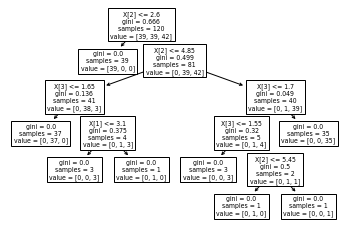

In [15]:
#посторим дерево решений 
from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по
тестовым данным. Для составления прогнозов используется метод predict
класса Decision Tree Classifier. Взгляните на следующий код для
использования.

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые
прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач
классификации обычно используются такие метрики, как матрица
путаницы, точность. Библиотека Scikit-Learn metrics содержит методы
classification_report и confusion_matrix, которые могут быть использованы
для расчета этих метрик.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  3]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.73      0.84        11
   virginica       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых
экземпляров наш алгоритм неправильно классифицировал только 3. Это
приблизительно 91 % точности.

Задача: Постройте классификатор на основе дерева принятия решений
следующего датасета:
#данные 
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]
df = pd.DataFrame(data = X, columns = ['Значение1', 'Значение2'])
df['target'] = target
df

,Значение1,Значение2,target
0,-1,-1,0
1,-2,-1,0
2,-3,-2,0
3,1,1,1
4,2,1,1
5,3,2,1


In [25]:
df.shape

(6, 3)

In [26]:
df.head()

,Значение1,Значение2,target
0,-1,-1,0
1,-2,-1,0
2,-3,-2,0
3,1,1,1
4,2,1,1


In [28]:
#разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # указываем iloc
    df.iloc[:, :-1], #берем все колонки кроме последней в признаки 
    df.iloc[:, -1], #последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4, 2), (2, 2), (4,), (2,))

In [29]:
X_train.head()

,Значение1,Значение2
5,3,2
3,1,1
0,-1,-1
1,-2,-1


In [30]:
y_train.head()

5    1
3    1
0    0
1    0
Name: target, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(167.4, 163.07999999999998, 'X[0] <= 0.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

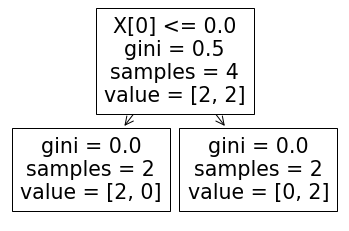

In [32]:
#посторим дерево решений 
from sklearn import tree
tree.plot_tree(classifier)

In [33]:
#Для составления прогнозов используется метод predict класса Decision Tree Classifier. 
#Взгляните на следующий код для использования.
y_pred = classifier.predict(X_test)
y_pred

array([0, 1], dtype=int64)

In [34]:
#проверяю на точность
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



1.4.1 Пример. 
Постойте регрессию с использованием дерева решений, реализованного в
Python.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url= r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

#Исследуем набор данных
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


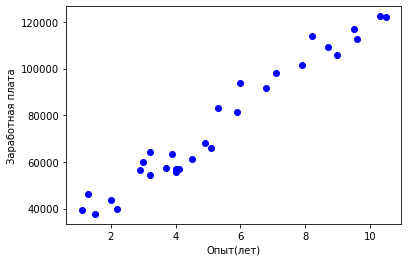

In [19]:
#Нарисуем точечную  диаграмму
plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Заработная плата")
plt.xlabel("Опыт(лет)")
plt.ylabel("Заработная плата")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

#Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
#Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#далее можно обучить алгоритм линейной регрессии
#необходимо импортировать класс LinearRegression, создать его экзмепляр и вызвать метод fit()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


DecisionTreeRegressor()

[Text(165.95689655172413, 203.85, 'X[0] <= 5.2\nmse = 614737637.832\nsamples = 24\nvalue = 73886.208'),
 Text(69.26896551724138, 176.67000000000002, 'X[0] <= 2.55\nmse = 81200345.857\nsamples = 14\nvalue = 54976.0'),
 Text(23.089655172413792, 149.49, 'X[0] <= 1.2\nmse = 7820714.0\nsamples = 4\nvalue = 42241.0'),
 Text(11.544827586206896, 122.31, 'mse = 0.0\nsamples = 1\nvalue = 39343.0'),
 Text(34.63448275862069, 122.31, 'X[0] <= 2.1\nmse = 6694994.667\nsamples = 3\nvalue = 43207.0'),
 Text(23.089655172413792, 95.13, 'X[0] <= 1.65\nmse = 1795600.0\nsamples = 2\nvalue = 44865.0'),
 Text(11.544827586206896, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 46205.0'),
 Text(34.63448275862069, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 43525.0'),
 Text(46.179310344827584, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 39891.0'),
 Text(115.44827586206895, 149.49, 'X[0] <= 4.7\nmse = 19731272.6\nsamples = 10\nvalue = 60070.0'),
 Text(92.35862068965517, 122.31, 'X[0] <= 4.25\nmse = 949992

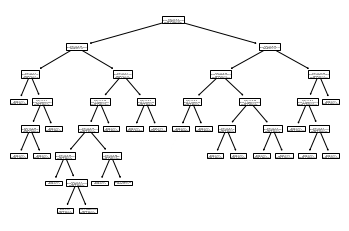

In [22]:
from sklearn import tree
tree.plot_tree(regressor)

In [23]:
#построим прогноз
y_pred = regressor.predict(X_test)
y_pred

array([ 46205. , 121872. ,  56375.5,  56375.5, 112635. , 105582. ])

In [24]:
#Теперь сравним некоторые из наших прогнозируемых значений с фактическими значениями:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,37731.0,46205.0
1,122391.0,121872.0
2,57081.0,56375.5
3,63218.0,56375.5
4,116969.0,112635.0
5,109431.0,105582.0


In [25]:
#Рассчитаем среднюю абсолютную и среднеквадратичную ошибку регрессии:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 25498988.416666668
Mean Absolute Error: 4120.666666666667


In [26]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

5.421715809463662

Средняя абсолютная ошибка для нашего алгоритма составляет 4120.66,
что составляет менее 6 процентов от среднего значения всех значений в
столбце.

Задание.  Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pet
rol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url= r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
dataset.head()

#Исследуем набор данных
print(dataset.shape)
dataset.describe()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


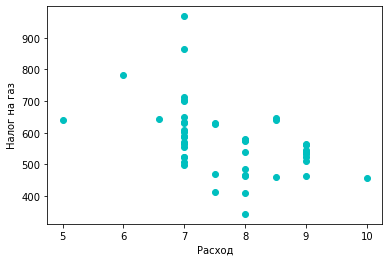

In [8]:
#Нарисуем точечную  диаграмму
plt.scatter(dataset['Petrol_tax'], dataset['Petrol_Consumption'], color = 'c', label = "Потребление газа")
plt.xlabel("Расход")
plt.ylabel("Налог на газ")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

#Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
#Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#далее можно обучить алгоритм линейной регрессии
#необходимо импортировать класс LinearRegression, создать его экзмепляр и вызвать метод fit()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

DecisionTreeRegressor()

[Text(163.13750000000002, 203.85, 'X[1] <= 4396.0\nmse = 288278.46\nsamples = 38\nvalue = 4317.526'),
 Text(76.72500000000001, 176.67000000000002, 'X[1] <= 3955.0\nmse = 103912.083\nsamples = 23\nvalue = 3964.217'),
 Text(29.45, 149.49, 'X[1] <= 3464.0\nmse = 28944.0\nsamples = 11\nvalue = 3659.0'),
 Text(12.4, 122.31, 'X[3] <= 0.53\nmse = 144.0\nsamples = 2\nvalue = 3345.0'),
 Text(6.2, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 3333.0'),
 Text(18.6, 95.13, 'mse = 0.0\nsamples = 1\nvalue = 3357.0'),
 Text(46.5, 122.31, 'X[1] <= 3773.5\nmse = 8564.84\nsamples = 9\nvalue = 3728.778'),
 Text(31.0, 95.13, 'X[1] <= 3687.0\nmse = 3606.556\nsamples = 6\nvalue = 3674.333'),
 Text(18.6, 67.94999999999999, 'X[2] <= 2625.0\nmse = 1306.889\nsamples = 3\nvalue = 3620.667'),
 Text(12.4, 40.77000000000001, 'mse = 0.0\nsamples = 1\nvalue = 3571.0'),
 Text(24.8, 40.77000000000001, 'X[0] <= 7.75\nmse = 110.25\nsamples = 2\nvalue = 3645.5'),
 Text(18.6, 13.590000000000003, 'mse = 0.0\nsamples = 1\nvalue = 

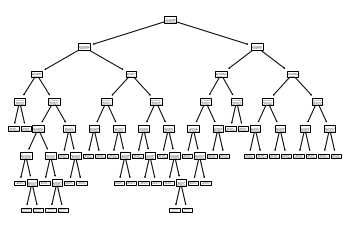

In [11]:
from sklearn import tree
tree.plot_tree(regressor)

In [12]:
#построим прогноз
y_pred = regressor.predict(X_test)
y_pred

array([3635., 4447., 3357., 3656., 3357., 3802., 3635., 4512., 5342.,
       4318.])

In [13]:
#Теперь сравним некоторые из наших прогнозируемых значений с фактическими значениями:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,3601,3635.0
1,4399,4447.0
2,3448,3357.0
3,3640,3656.0
4,3063,3357.0
5,3897,3802.0
6,3528,3635.0
7,4449,4512.0
8,5126,5342.0
9,4391,4318.0


In [14]:
#Рассчитаем среднюю абсолютную и среднеквадратичную ошибку регрессии:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 17486.1
Mean Absolute Error: 103.7


In [15]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

2.4446976543161374